# First, we get the actual data

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
files = os.listdir("./Sales_Data/")
li = []
for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    li.append(df)

data = pd.concat(li)
print(data.shape)
data.head()

(186850, 6)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## clean up time

In [4]:
df = data.dropna(how='all')
print(df.shape)
df.head()

(186305, 6)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [5]:
df = df[df['Order Date'].str[:2]!='Or']

df.shape

(185950, 6)

### converting data types

In [6]:
df['Price Each'] = df['Price Each'].astype('float')
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int')

# Task 1: What was the best month for sales? How much was earned that month?

In [7]:
# adding the month column
df1 = df.copy()
df1['Month'] = pd.to_numeric(df1['Order Date'].str[:2])

# data frame sort by date
df1['Order Date'] = pd.to_datetime(df1['Order Date'])
df1 = df1.sort_values(by='Order Date')

df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
6344,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",1
7154,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",1
8507,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",1
9161,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",1
8514,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",1


In [8]:
df1.shape

(185950, 7)

In [24]:
sums = pd.DataFrame(columns = ['Month','Sales'])
for i in range(1,13):
    dm = df1[df1['Month']==i]
    summ = dm['Quantity Ordered']*dm['Price Each']
    summ = summ.sum()
    sums = sums.append([pd.DataFrame([[i, summ]], columns=sums.columns)])

sums

,Month,Sales
0,1,1822256.73
0,2,2202022.42
0,3,2807100.38
0,4,3390670.24
0,5,3152606.75
0,6,2577802.26
0,7,2647775.76
0,8,2244467.88
0,9,2097560.13
0,10,3736726.88


4613443.339999999


<AxesSubplot:xlabel='Month'>

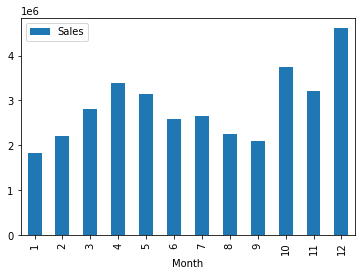

In [25]:
print(max(sums['Sales']))
sums.plot(kind = 'bar', x = 'Month')

### As we can see, December was the best month for sales. The unnamed company's income was 4613443 USD

# Task 2: What city sold the most product?

In [31]:
df2 = df.copy()
city = df2['Purchase Address'].str.split(', ').str[1]

df2['City'] = city
df2['Net'] = df2['Price Each']*df2['Quantity Ordered']
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Net
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles,11.99


In [32]:
sales = df2.groupby('City').sum()

sales.head()

,Quantity Ordered,Price Each,Net
City,,,
Atlanta,16602,2.779908e+06,2.795499e+06
Austin,11153,1.809874e+06,1.819582e+06
Boston,22528,3.637410e+06,3.661642e+06
Dallas,16730,2.752628e+06,2.767975e+06
Los Angeles,33289,5.421435e+06,5.452571e+06


<AxesSubplot:xlabel='City'>

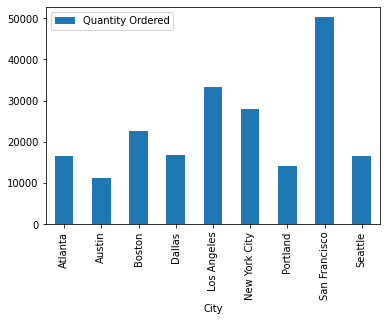

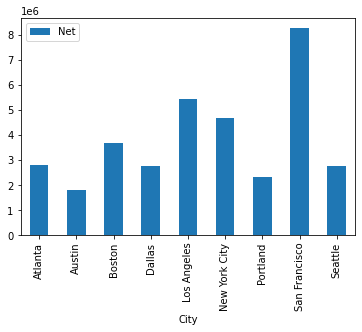

In [37]:
sales.plot(kind = 'bar', y='Quantity Ordered')
sales.plot(kind = 'bar', y='Net')

### San Francisco sold the most product, also having the largest net sales revenue

# Task 3: What time should we display advertisemens to maximize the likelihood of customer’s buying product?


In [46]:
df3 = df.copy()
df3['Time'] = df3['Order Date'].str[-5:]
df3.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",08:46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",22:30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",14:38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",14:38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",09:27


In [51]:
orders = df3.groupby('Time').sum()
orders.head()

,Quantity Ordered,Price Each
Time,,
00:00,91,22450.44
00:01,73,12772.26
00:02,81,12464.85
00:03,101,18683.49
00:04,96,16914.39


<AxesSubplot:xlabel='Time'>

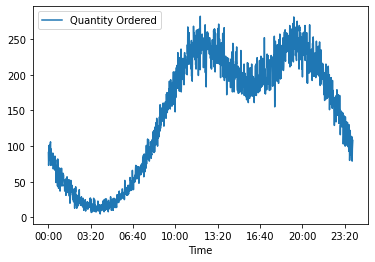

In [53]:
orders.plot(kind='line', y='Quantity Ordered')

### As we can see, the largest amount of products was sold around noon and around 7-8pm.

<AxesSubplot:xlabel='Time'>

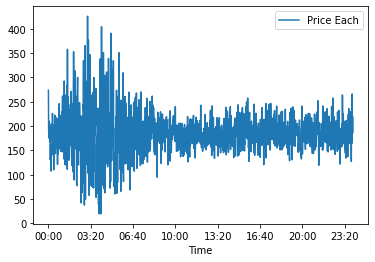

In [58]:
df3.groupby('Time').mean().plot(kind='line', y='Price Each')

### I would prognose that the best time for advertisement would be 10:00-13:00 and 18:30-20:00. As an experiment, I attempted to corelate mean price with time, but it turned out to be a useless metric, cosidering that the amount of products sold changed drastically with time, while the price for each product stayed fixed.

# Task 4: What products are most often sold together?

In [9]:
df4 = df.copy()
df4 = df4.sort_values(by='Product')

orders = df4.groupby('Order ID')
all_orders = orders['Product'].unique()

In [10]:
order_combinations = all_orders.value_counts()

In [11]:
combination_count = pd.DataFrame(order_combinations, columns=['list', 'Product'])
combination_count['list'] = combination_count.index
combination_count.index = range(combination_count.shape[0])
combination_count = combination_count[combination_count['list'].apply(len)>=2]

combination_count['list'] = combination_count['list'].astype('str')
combination_count = combination_count.groupby('list').sum()

combination_count = combination_count.sort_values(by='Product', ascending=False)
combination_count.head(30)

,Product
list,
['Lightning Charging Cable' 'iPhone'],895
['Google Phone' 'USB-C Charging Cable'],869
['Wired Headphones' 'iPhone'],374
['USB-C Charging Cable' 'Vareebadd Phone'],318
['Google Phone' 'Wired Headphones'],311
['Apple Airpods Headphones' 'iPhone'],299
['Bose SoundSport Headphones' 'Google Phone'],169
['Vareebadd Phone' 'Wired Headphones'],110
['AA Batteries (4-pack)' 'Lightning Charging Cable'],103


### Vsualising the data:

<AxesSubplot:xlabel='list'>

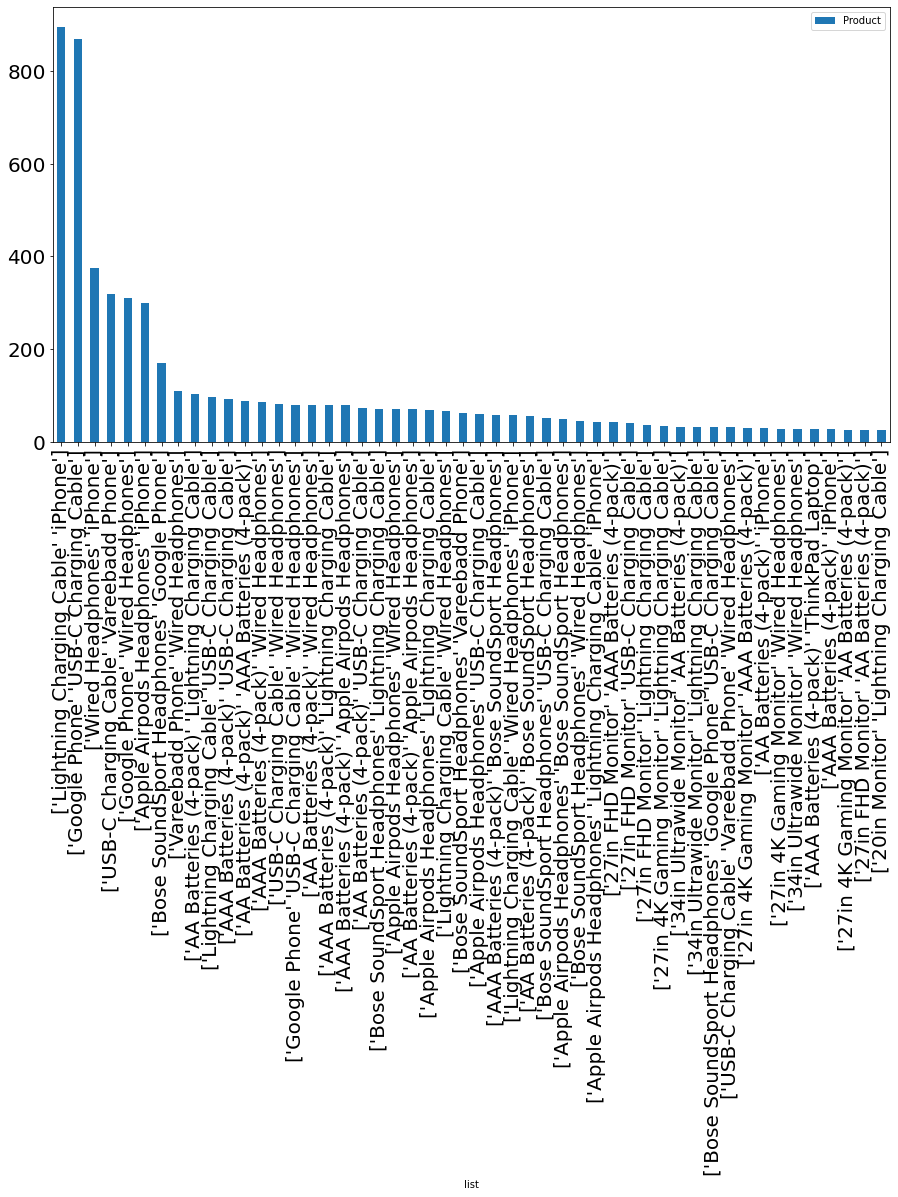

In [15]:
combination_count[:50].plot(kind='bar', fontsize=20, figsize=(15,8))

## As we can see, the most popular combination seems to be the Iphone with lightning charging cable, with the google phone/type c combination at close second

# Task 5: What product sold the most? Why do you think it sold the most?

In [18]:
df5 = df.copy()

products = df5.groupby('Product')['Price Each'].count()

In [19]:
products

Product
20in Monitor                   4101
27in 4K Gaming Monitor         6230
27in FHD Monitor               7507
34in Ultrawide Monitor         6181
AA Batteries (4-pack)         20577
AAA Batteries (4-pack)        20641
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
Flatscreen TV                  4800
Google Phone                   5525
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      21658
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
USB-C Charging Cable          21903
Vareebadd Phone                2065
Wired Headphones              18882
iPhone                         6842
Name: Price Each, dtype: int64

### As we can see, the two most commonly sold products were the batteries and the charging cables. The batteries were probably in demand due to the fact that they're a cheap consumable product(meaning many people restock them regularly), while the cables are just a lower end product that every household needs, sometimes more than one. There's also the fact that cables are easy to lose and might get shredded over time, making the customer get a new one.